# creation of deep-conus project dataset for training

Notebook author: Maria J. Molina, AOSC/UMD/NCAR for Rain Haworth, CS/UMD

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import json
import matplotlib.pyplot as plt

## opening and preprocessing storm patches 

In [2]:
climate = 'current'

In [3]:
ds = xr.open_mfdataset(
    f'/glade/scratch/molina/DL_proj/{climate}_conus_fields/dl_preprocess/*',
    combine='nested', concat_dim='patch')

In [4]:
ds = ds.drop(
    labels=['uh03_sev_1','wwnd_sev_1','wwnd_sev_3','wwnd_sev_5','wwnd_sev_7','mask_sev_1'])

In [5]:
variables = ['temp_sev_1', 'temp_sev_3', 'temp_sev_5', 'temp_sev_7', 
             'evwd_sev_1', 'evwd_sev_3', 'evwd_sev_5', 'evwd_sev_7', 
             'euwd_sev_1', 'euwd_sev_3', 'euwd_sev_5', 'euwd_sev_7', 
             'qvap_sev_1', 'qvap_sev_3', 'qvap_sev_5', 'qvap_sev_7', 
             'pres_sev_1', 'pres_sev_3', 'pres_sev_5', 'pres_sev_7',
             'maxw_sev_1', 'dbzs_sev_1', 'ctts_sev_1', 'uh25_sev_1']

## removing nans

In [6]:
each_var_dict = {}

for num, v in enumerate(variables):
    
    each_var_dict[num] = ds[v]

for num, v in enumerate(variables):
    
    mask = np.isnan(
        each_var_dict[num][:,:,:].values).any(axis=2).any(axis=1)

    for num, v in enumerate(variables):
        
        each_var_dict[num] = each_var_dict[num][~mask]

In [7]:
# double checking no nans in files
for num, v in enumerate(variables):
    if np.any(np.isnan(each_var_dict[num].values)):
        print('encountered issue!')

## assemble spatial data

In [8]:
data_for_fewshot = xr.Dataset({
    
    'tk_1km': (['patch','y','x'], each_var_dict[0].data),
    'tk_3km': (['patch','y','x'], each_var_dict[1].data),
    'tk_5km': (['patch','y','x'], each_var_dict[2].data),
    'tk_7km': (['patch','y','x'], each_var_dict[3].data),
    
    'ev_1km': (['patch','y','x'], each_var_dict[4].data),
    'ev_3km': (['patch','y','x'], each_var_dict[5].data),
    'ev_5km': (['patch','y','x'], each_var_dict[6].data),
    'ev_7km': (['patch','y','x'], each_var_dict[7].data),
    
    'eu_1km': (['patch','y','x'], each_var_dict[8].data),
    'eu_3km': (['patch','y','x'], each_var_dict[9].data),
    'eu_5km': (['patch','y','x'], each_var_dict[10].data),
    'eu_7km': (['patch','y','x'], each_var_dict[11].data),
    
    'qv_1km': (['patch','y','x'], each_var_dict[12].data),
    'qv_3km': (['patch','y','x'], each_var_dict[13].data),
    'qv_5km': (['patch','y','x'], each_var_dict[14].data),
    'qv_7km': (['patch','y','x'], each_var_dict[15].data),
    
    'pr_1km': (['patch','y','x'], each_var_dict[16].data),
    'pr_3km': (['patch','y','x'], each_var_dict[17].data),
    'pr_5km': (['patch','y','x'], each_var_dict[18].data),
    'pr_7km': (['patch','y','x'], each_var_dict[19].data),
    
    'wmax'  : (['patch','y','x'], each_var_dict[20].data),
    'dbz'   : (['patch','y','x'], each_var_dict[21].data),
    'ctt'   : (['patch','y','x'], each_var_dict[22].data),
    'uh25'  : (['patch','y','x'], each_var_dict[23].data),
})

In [9]:
data_for_fewshot

<xarray.Dataset>
Dimensions:  (patch: 1383869, y: 32, x: 32)
Dimensions without coordinates: patch, y, x
Data variables: (12/24)
    tk_1km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    tk_3km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    tk_5km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    tk_7km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    ev_1km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    ev_3km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    ...       ...
    pr_5km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    pr_7km   (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    wmax     (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    dbz      (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    ctt      (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>
    uh25     (patch, y, x) float32 dask.array<chunksize=(113503, 32, 32), meta=np.ndarray>

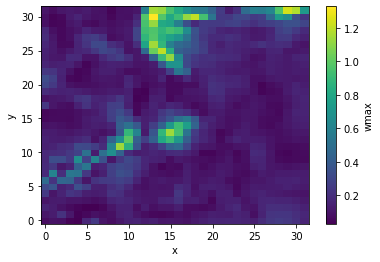

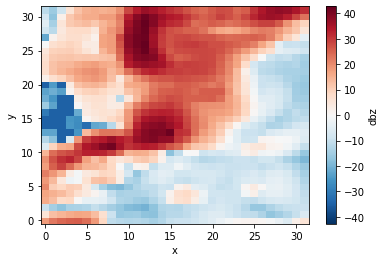

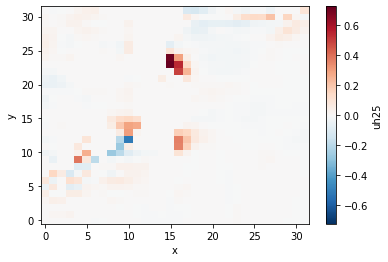

In [10]:
data_for_fewshot.isel(patch=100)['wmax'].plot(); plt.show()
data_for_fewshot.isel(patch=100)['dbz'].plot(); plt.show()
data_for_fewshot.isel(patch=100)['uh25'].plot(); plt.show()

## save spatial data

In [11]:
data_for_fewshot.isel(
    patch=slice(0,450000)).to_netcdf('/glade/scratch/molina/spatial_storm_data_part1.nc')

In [12]:
data_for_fewshot.isel(
    patch=slice(450000,900000)).to_netcdf('/glade/scratch/molina/spatial_storm_data_part2.nc')

In [13]:
data_for_fewshot.isel(
    patch=slice(900000,1383869)).to_netcdf('/glade/scratch/molina/spatial_storm_data_part3.nc')

## spatial data metadata

In [14]:
metadata = {
    
    "Data Description": "Each storm patch is/was on 32x32 pixels (Molina et al. 2021).\
    Storm objects were extracted from WRF simulations run at 4-km grid spacing (Liu et al. 2017).\
    Thunderstorms are from a historical set of simulations (2000-2013) spanning a six month period (December-May).",
    
    "tk_1km": "temperature in degrees Kelvin at 1-km above ground level.", 
    "tk_3km": "temperature in degrees Kelvin at 3-km above ground level.", 
    "tk_5km": "temperature in degrees Kelvin at 5-km above ground level.", 
    "tk_7km": "temperature in degrees Kelvin at 7-km above ground level.",
    
    "ev_1km": "meridional wind (y-direction) in m/s at 1-km above ground level.", 
    "ev_3km": "meridional wind (y-direction) in m/s at 3-km above ground level.", 
    "ev_5km": "meridional wind (y-direction) in m/s at 5-km above ground level.", 
    "ev_7km": "meridional wind (y-direction) in m/s at 7-km above ground level.",
    
    "eu_1km": "zonal wind (x-direction) in m/s at 1-km above ground level.", 
    "eu_3km": "zonal wind (x-direction) in m/s at 3-km above ground level.", 
    "eu_5km": "zonal wind (x-direction) in m/s at 5-km above ground level.", 
    "eu_7km": "zonal wind (x-direction) in m/s at 7-km above ground level.",
    
    "qv_1km": "water vapor mixing ratio in kg/kg at 1-km above ground level.", 
    "qv_3km": "water vapor mixing ratio in kg/kg at 3-km above ground level.", 
    "qv_5km": "water vapor mixing ratio in kg/kg at 5-km above ground level.", 
    "qv_7km": "water vapor mixing ratio in kg/kg at 7-km above ground level.",
    
    "pr_1km": "pressure in hPa at 1-km above ground level.", 
    "pr_3km": "pressure in hPa at 3-km above ground level.", 
    "pr_5km": "pressure in hPa at 5-km above ground level.",
    "pr_7km": "pressure in hPa at 7-km above ground level.",
    
    "wmax": "maximum vertical wind speed.", 
    "dbz": "simulated radar reflectivity.", 
    "ctt": "cloud top temperature (colder means more intense).", 
    "uh25": "maximum updraft helicity (2-5 km) in m2/s2.", 
    
}

In [15]:
with open('/glade/scratch/molina/spatial_storm_metadata.txt', 'w') as f: 
    for key, value in metadata.items(): 
        f.write('%s:%s\n' % (key, value))
        
with open('/glade/scratch/molina/spatial_storm_metadata.json', 'w') as fp:
    json.dump(metadata, fp, indent=4)

## compute tabular data

In [16]:
t_1km = each_var_dict[0].mean(['y','x'],skipna=True).values
t_3km = each_var_dict[1].mean(['y','x'],skipna=True).values
t_5km = each_var_dict[2].mean(['y','x'],skipna=True).values
t_7km = each_var_dict[3].mean(['y','x'],skipna=True).values

v_1km = each_var_dict[4].mean(['y','x'],skipna=True).values
v_3km = each_var_dict[5].mean(['y','x'],skipna=True).values
v_5km = each_var_dict[6].mean(['y','x'],skipna=True).values
v_7km = each_var_dict[7].mean(['y','x'],skipna=True).values

u_1km = each_var_dict[8].mean(['y','x'],skipna=True).values
u_3km = each_var_dict[9].mean(['y','x'],skipna=True).values
u_5km = each_var_dict[10].mean(['y','x'],skipna=True).values
u_7km = each_var_dict[11].mean(['y','x'],skipna=True).values

q_1km = each_var_dict[12].mean(['y','x'],skipna=True).values
q_3km = each_var_dict[13].mean(['y','x'],skipna=True).values
q_5km = each_var_dict[14].mean(['y','x'],skipna=True).values
q_7km = each_var_dict[15].mean(['y','x'],skipna=True).values

p_1km = each_var_dict[16].mean(['y','x'],skipna=True).values
p_3km = each_var_dict[17].mean(['y','x'],skipna=True).values
p_5km = each_var_dict[18].mean(['y','x'],skipna=True).values
p_7km = each_var_dict[19].mean(['y','x'],skipna=True).values

w_mx   = each_var_dict[20].max( ['y','x'],skipna=True).values

dbz_mx = each_var_dict[21].max( ['y','x'],skipna=True).values
dbz_mn = each_var_dict[21].mean(['y','x'],skipna=True).values

ctt_mx = each_var_dict[22].max( ['y','x'],skipna=True).values
ctt_mn = each_var_dict[22].mean(['y','x'],skipna=True).values

uh25mx = each_var_dict[23].max( ['y','x'],skipna=True).values

## assemble tabular data

In [17]:
data_columns = [
    "tk_1km", "tk_3km", "tk_5km", "tk_7km",
    "ev_1km", "ev_3km", "ev_5km", "ev_7km",
    "eu_1km", "eu_3km", "eu_5km", "eu_7km",
    "qv_1km", "qv_3km", "qv_5km", "qv_7km",
    "pr_1km", "pr_3km", "pr_5km", "pr_7km",
    "w_max", 
    "dbz_max", "dbz_mean",
    "ctt_max", "ctt_mean", 
    "uh25_max",
]

In [18]:
data_table = pd.DataFrame(columns = data_columns)

for numer in np.arange(0, t_1km.shape[0], 1)[:450000]:

    data_table.loc[numer] = [
                        t_1km[numer], t_3km[numer], t_5km[numer], t_7km[numer],
                        v_1km[numer], v_3km[numer], v_5km[numer], v_7km[numer],
                        u_1km[numer], u_3km[numer], u_5km[numer], u_7km[numer],
                        q_1km[numer], q_3km[numer], q_5km[numer], q_7km[numer],
                        p_1km[numer], p_3km[numer], p_5km[numer], p_7km[numer],
                        w_mx[numer], 
                        dbz_mx[numer], dbz_mn[numer],
                        ctt_mx[numer], ctt_mn[numer],
                        uh25mx[numer]
    ]

In [19]:
data_table.to_parquet(f'/glade/scratch/molina/tabular_storm_data_part1.parquet')
data_table.to_csv(f'/glade/scratch/molina/tabular_storm_data_part1.csv')

In [20]:
data_table = pd.DataFrame(columns = data_columns)

for numer in np.arange(0, t_1km.shape[0], 1)[450000:900000]:

    data_table.loc[numer] = [
                        t_1km[numer], t_3km[numer], t_5km[numer], t_7km[numer],
                        v_1km[numer], v_3km[numer], v_5km[numer], v_7km[numer],
                        u_1km[numer], u_3km[numer], u_5km[numer], u_7km[numer],
                        q_1km[numer], q_3km[numer], q_5km[numer], q_7km[numer],
                        p_1km[numer], p_3km[numer], p_5km[numer], p_7km[numer],
                        w_mx[numer], 
                        dbz_mx[numer], dbz_mn[numer],
                        ctt_mx[numer], ctt_mn[numer],
                        uh25mx[numer]
    ]

In [21]:
data_table.to_parquet(f'/glade/scratch/molina/tabular_storm_data_part2.parquet')
data_table.to_csv(f'/glade/scratch/molina/tabular_storm_data_part2.csv')

In [22]:
data_table = pd.DataFrame(columns = data_columns)

for numer in np.arange(0, t_1km.shape[0], 1)[900000:]:

    data_table.loc[numer] = [
                        t_1km[numer], t_3km[numer], t_5km[numer], t_7km[numer],
                        v_1km[numer], v_3km[numer], v_5km[numer], v_7km[numer],
                        u_1km[numer], u_3km[numer], u_5km[numer], u_7km[numer],
                        q_1km[numer], q_3km[numer], q_5km[numer], q_7km[numer],
                        p_1km[numer], p_3km[numer], p_5km[numer], p_7km[numer],
                        w_mx[numer], 
                        dbz_mx[numer], dbz_mn[numer],
                        ctt_mx[numer], ctt_mn[numer],
                        uh25mx[numer]
    ]

In [23]:
data_table.to_parquet(f'/glade/scratch/molina/tabular_storm_data_part3.parquet')
data_table.to_csv(f'/glade/scratch/molina/tabular_storm_data_part3.csv')

## tabular metadata

In [24]:
metadata = {
    "Data Description": "Each storm patch was on 32x32 pixels (Molina et al. 2021).\
    Storm objects were extracted from WRF simulations run at 4-km grid spacing (Liu et al. 2017).\
    Thunderstorms are from a historical set of simulations (2000-2013) spanning a six month period (December-May).",
    
    "tk_1km": "mean temperature in degrees Kelvin at 1-km above ground level.", 
    "tk_3km": "mean temperature in degrees Kelvin at 3-km above ground level.", 
    "tk_5km": "mean temperature in degrees Kelvin at 5-km above ground level.", 
    "tk_7km": "mean temperature in degrees Kelvin at 7-km above ground level.",
    
    "ev_1km": "mean meridional wind (y-direction) in m/s at 1-km above ground level.", 
    "ev_3km": "mean meridional wind (y-direction) in m/s at 3-km above ground level.", 
    "ev_5km": "mean meridional wind (y-direction) in m/s at 5-km above ground level.", 
    "ev_7km": "mean meridional wind (y-direction) in m/s at 7-km above ground level.",
    
    "eu_1km": "mean zonal wind (x-direction) in m/s at 1-km above ground level.", 
    "eu_3km": "mean zonal wind (x-direction) in m/s at 3-km above ground level.", 
    "eu_5km": "mean zonal wind (x-direction) in m/s at 5-km above ground level.", 
    "eu_7km": "mean zonal wind (x-direction) in m/s at 7-km above ground level.",
    
    "qv_1km": "mean water vapor mixing ratio in kg/kg at 1-km above ground level.", 
    "qv_3km": "mean water vapor mixing ratio in kg/kg at 3-km above ground level.", 
    "qv_5km": "mean water vapor mixing ratio in kg/kg at 5-km above ground level.", 
    "qv_7km": "mean water vapor mixing ratio in kg/kg at 7-km above ground level.",
    
    "pr_1km": "mean pressure in hPa at 1-km above ground level.", 
    "pr_3km": "mean pressure in hPa at 3-km above ground level.", 
    "pr_5km": "mean pressure in hPa at 5-km above ground level.",
    "pr_7km": "mean pressure in hPa at 7-km above ground level.",
    
    "w_max": "maximum vertical wind speed.", 
    
    "dbz_max": "maximum simulated radar reflectivity.", 
    "dbz_mean": "mean simulated radar reflectivity.", 
    
    "ctt_max": "maximum cloud top temperature (colder means more intense).", 
    "ctt_mean": "mean cloud top temperature (colder means more intense).", 
    
    "uh25_max": "maximum updraft helicity (2-5 km) in m2/s2.", 
}

In [25]:
with open('/glade/scratch/molina/tabular_storm_metadata.txt', 'w') as f: 
    for key, value in metadata.items(): 
        f.write('%s:%s\n' % (key, value))
        
with open('/glade/scratch/molina/tabular_storm_metadata.json', 'w') as fp:
    json.dump(metadata, fp, indent=4)

## exploring saved data files

In [26]:
import pandas as pd
import xarray as xr

In [27]:
print(pd.read_parquet(f'/glade/scratch/molina/tabular_storm_data_part3.parquet'))

             tk_1km      tk_3km      tk_5km      tk_7km     ev_1km     ev_3km  \
index                                                                           
900000   289.959351  276.707977  264.158325  251.552002  22.655582   8.585445   
900001   289.900818  276.677551  264.044739  251.500580  22.903595   8.617258   
900002   289.951843  276.238159  264.630066  252.137970  24.107241  10.972805   
900003   289.810425  276.783600  263.856384  251.349884  23.201263   8.489887   
900004   289.807068  276.371887  264.551758  252.210449  24.811123  11.378922   
...             ...         ...         ...         ...        ...        ...   
1383864  284.814270  273.297546  261.455383  246.579041  13.029016  23.893280   
1383865  284.554962  272.986938  261.345154  246.636597  14.724516  23.359013   
1383866  287.659668  274.538635  263.320557  250.085419  24.462051  29.391586   
1383867  287.698883  274.127136  263.158508  249.709625  27.439442  31.093615   
1383868  286.207123  274.299

In [28]:
f = open('/glade/scratch/molina/tabular_storm_metadata.json')
json.load(f)

{'Data Description': 'Each storm patch was on 32x32 pixels (Molina et al. 2021).    Storm objects were extracted from WRF simulations run at 4-km grid spacing (Liu et al. 2017).    Thunderstorms are from a historical set of simulations (2000-2013) spanning a six month period (December-May).',
 'tk_1km': 'mean temperature in degrees Kelvin at 1-km above ground level.',
 'tk_3km': 'mean temperature in degrees Kelvin at 3-km above ground level.',
 'tk_5km': 'mean temperature in degrees Kelvin at 5-km above ground level.',
 'tk_7km': 'mean temperature in degrees Kelvin at 7-km above ground level.',
 'ev_1km': 'mean meridional wind (y-direction) in m/s at 1-km above ground level.',
 'ev_3km': 'mean meridional wind (y-direction) in m/s at 3-km above ground level.',
 'ev_5km': 'mean meridional wind (y-direction) in m/s at 5-km above ground level.',
 'ev_7km': 'mean meridional wind (y-direction) in m/s at 7-km above ground level.',
 'eu_1km': 'mean zonal wind (x-direction) in m/s at 1-km above